In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
a = 282e-12
q = 1.602e-19
k = 8.9875517923e9

K = k * q * q

In [3]:
ex = np.array([1, 0])
ey = np.array([0, 1])

order = 1
n = 2 * order + 1
lattice = np.zeros((n, n))

Cl = []
Na = []

for i in range(-order, order+1):
      for j in range(-order, order+1):
            if ((i+j)%2 == 0):
                  Na.append(a * (i * ex + j * ey))
            else:
                  Cl.append(a * (i * ex + j * ey))

Na.pop(n * n // 4)

array([0., 0.])

In [4]:
def F(x, xq):
    dx = x - xq
    r2 = dx.dot(dx)
    return K * (x - xq)/math.pow(r2, 1.5)

In [5]:
def fres(x):
    Fres = np.zeros(2)

    for xq in Cl:
        Fres = Fres - F(x, xq)

    for xq in Na:
        Fres = Fres + F(x, xq)

    return Fres

In [6]:
def f(y):
    return (4 * a * y/((a*a - y*y)*(a*a - y*y)) - 2 * y / np.power(y*y + a*a, 1.5) - 2 * (a-y)/np.power((a-y)*(a-y)+a*a, 1.5) + 2 * (a+y)/np.power((a+y)*(a+y)+a*a, 1.5))*K

# Graphs

f(y) is the theoretical graph (for nearest neighbours)

fres(y) is the calculated graph (up to **order** neighbours)

In [8]:
w = widgets.IntSlider()
w.value = 50
display(w)

IntSlider(value=50)

In [9]:
r = w.value/100

x = np.linspace(-a*r, a*r, 100)

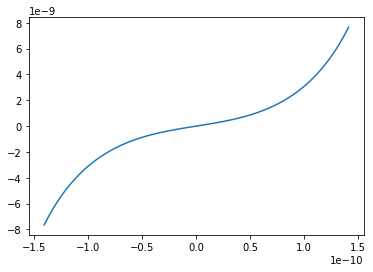

In [10]:
fig, ax = plt.subplots()
p1 = ax.plot(x, f(x))

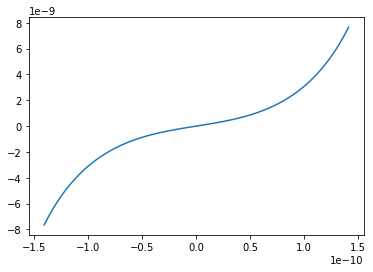

In [11]:
y = np.zeros(100)

for i in range(100):
    y[i] = fres(np.array([x[i], 0]))[0]

fig, ax = plt.subplots()
pltx = ax.plot(x, y)